# **Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# **Loading Dataset**

In [2]:
df = pd.read_csv(r"D:\RATHNA_UDEMY\kagg\train.csv.csv")

In [3]:
# head command will give top 5 rows and columns in dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape command will give number of rows  and number of columns in dataset
#(rows,columns)

df.shape

(1460, 81)

 There are total 1460 samples which we can use to train model and 80 features and 1 target variable

# **Variable Identification**

In [5]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [154]:
#How many columns with different datatypes are there?
import pandas as pd

# Count the data types
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)


object     43
int64      36
float64     5
Name: count, dtype: int64


In [162]:

# Identifying feature types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_features = df.select_dtypes(include=['object']).columns.tolist()

# Display the identified features
print("Numerical Features:", numerical_features)


print("Object Features:", object_features)


Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SqrtLotArea', 'SalePriceSF', 'ConstructionAge']
Object Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electr

In [155]:
##Describe gives statistical information about numerical columns in the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SqrtLotArea,SalePriceSF,ConstructionAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,76.644196,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,98.443050,120.572878,36.547945
std,421.610009,42.300571,31.274670,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,28.746478,31.391081,30.250152
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,36.055513,28.358738,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,86.910862,99.822008,8.000000
50%,730.500000,50.000000,73.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,97.357588,120.099031,35.000000
75%,1095.250000,70.000000,90.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,107.710259,138.700041,54.000000
max,1460.000000,190.000000,405.783193,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,463.945040,276.250881,136.000000


# Data anlayis we will analyze to find out below stuff
1.Missing values
2.Numerical values
3.Categorical values
4.Relationshiop between dependent and independent variables

In [9]:
#To fine the numbers of null values
features_with_na = df.isnull().sum()

In [10]:
features_with_na

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
features_with_na = [item for item in df.columns if df[item].isnull().sum()>0]

In [15]:
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

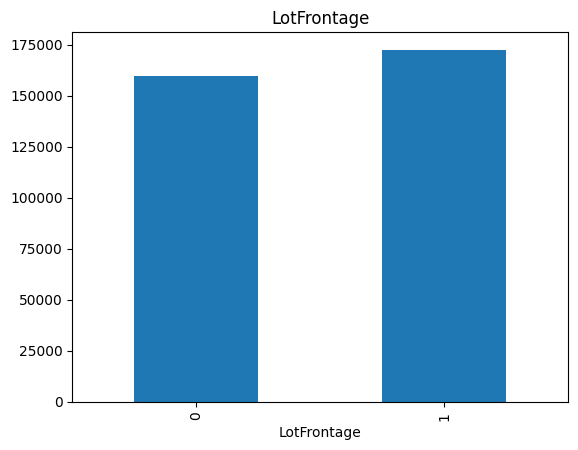

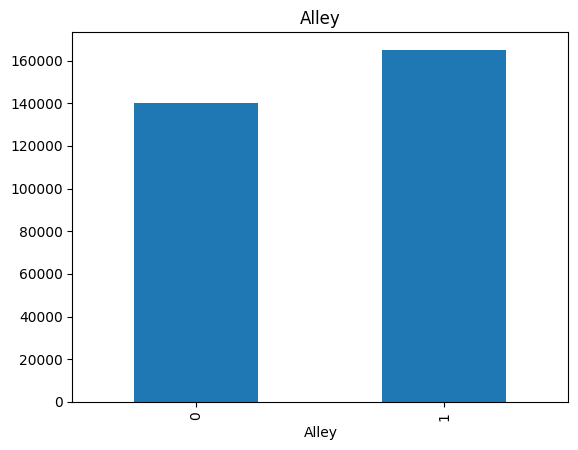

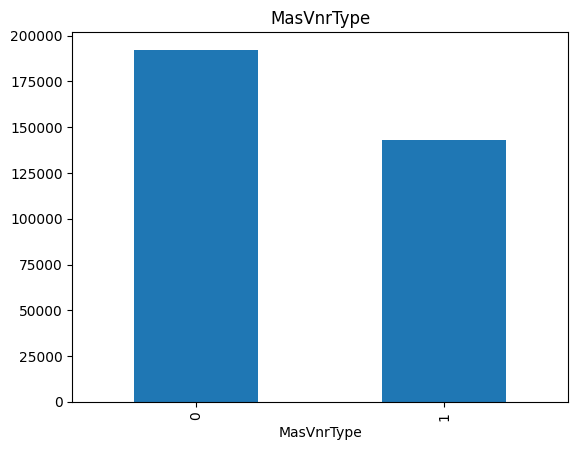

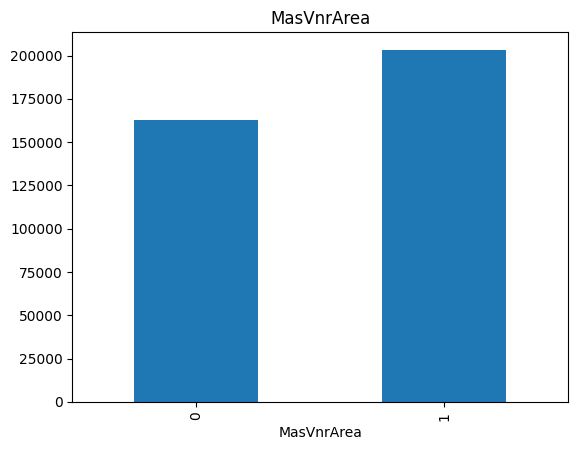

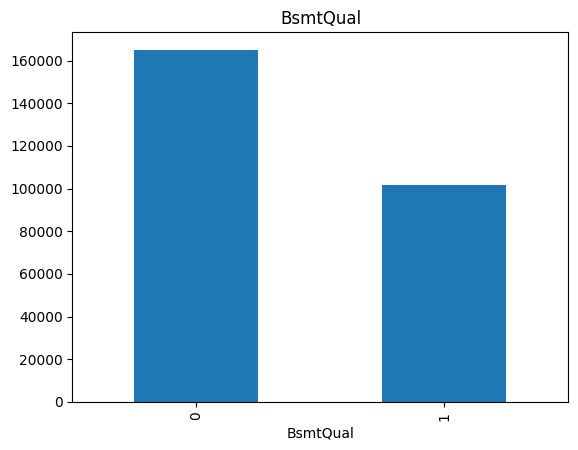

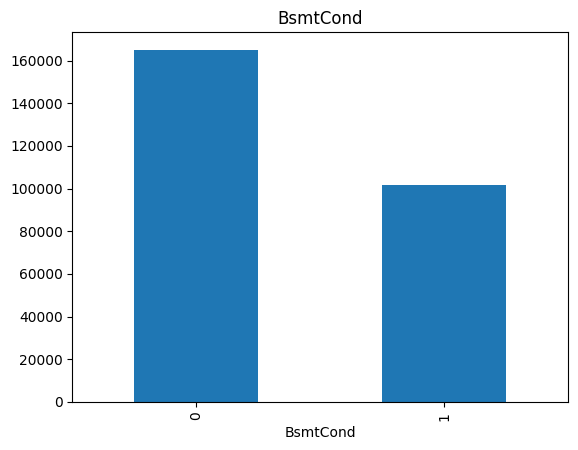

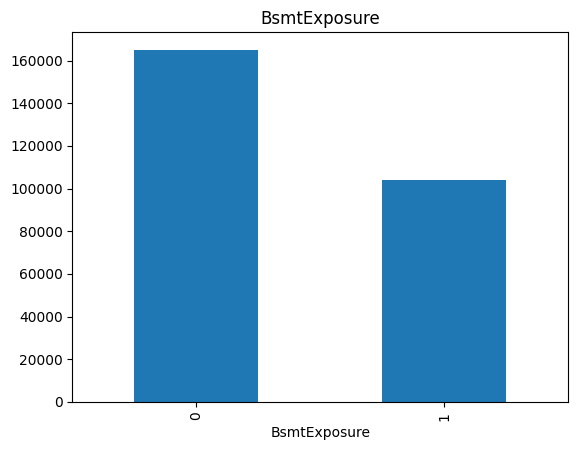

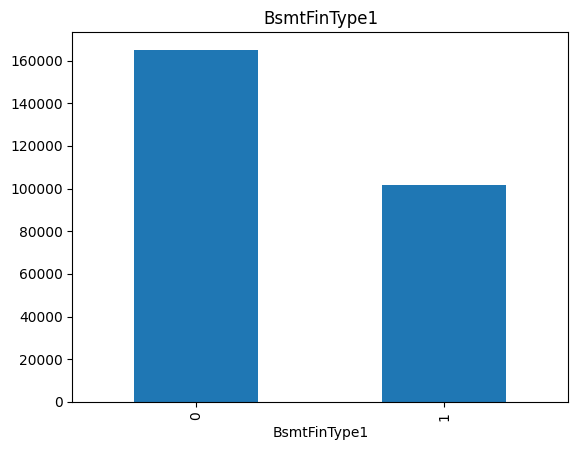

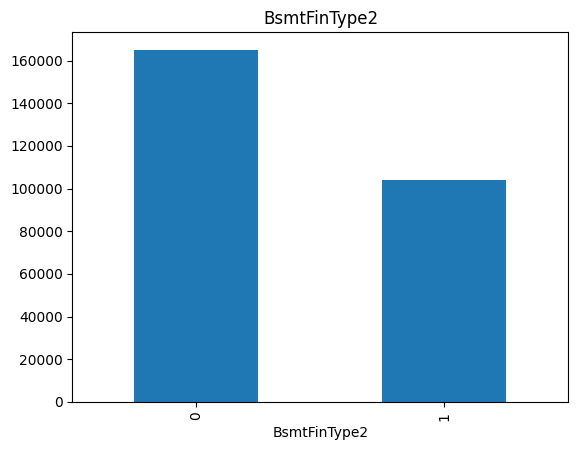

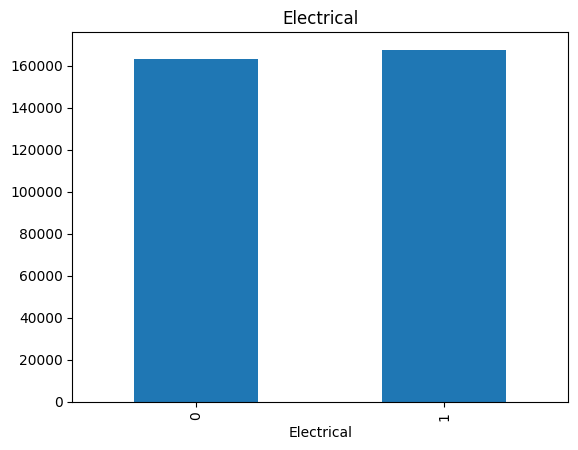

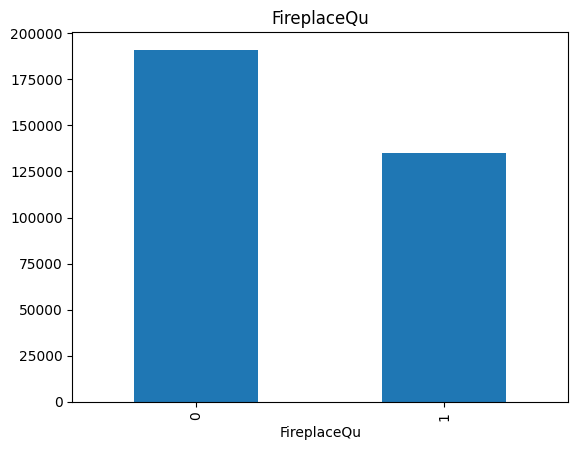

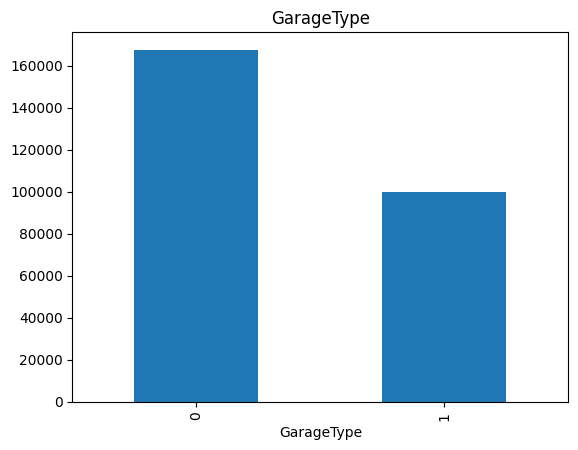

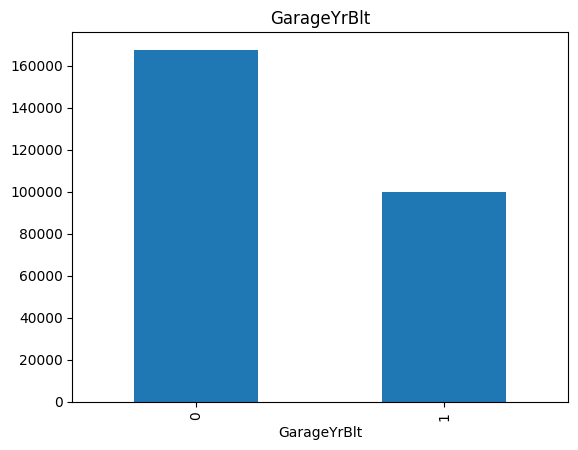

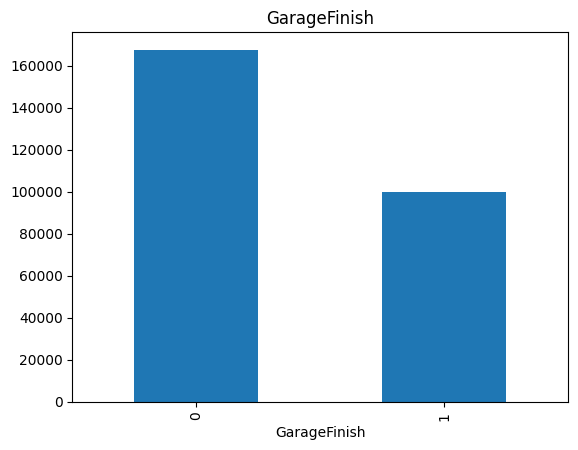

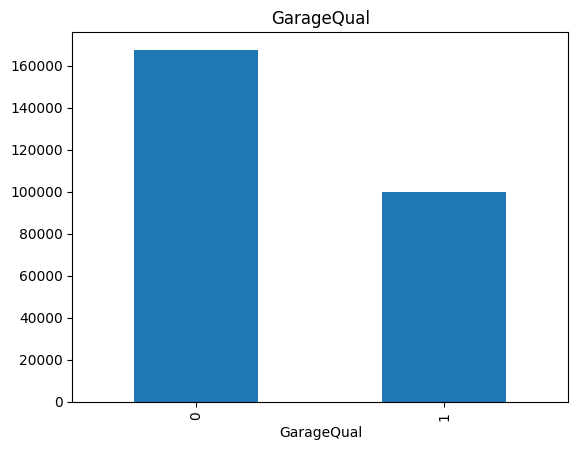

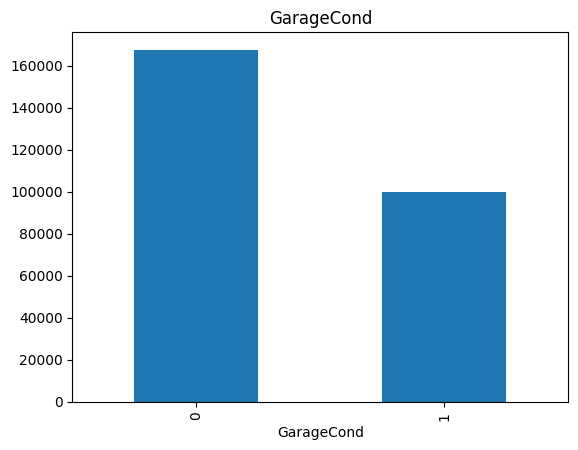

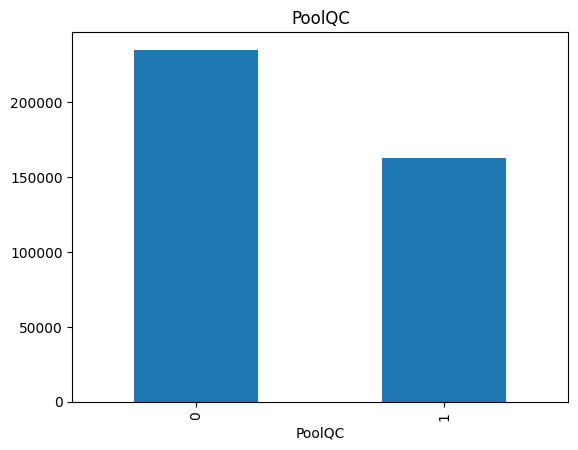

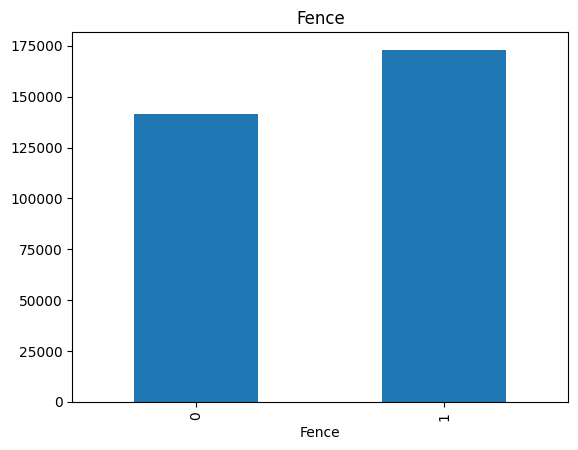

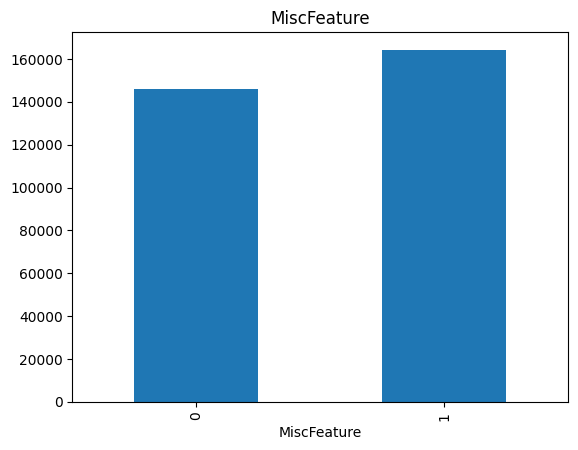

In [19]:
for feature in features_with_na:
    data = df.copy()

    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# **NUMERICAL FEATURES**

In [21]:

num_features = [item for item in df.columns if df.dtypes[item] !='O']
df[num_features ]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


# **DATETIME VARIABLES**

In [22]:

year_features = [item for item in num_features if 'Yr' in item or 'Year' in item]
df[year_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


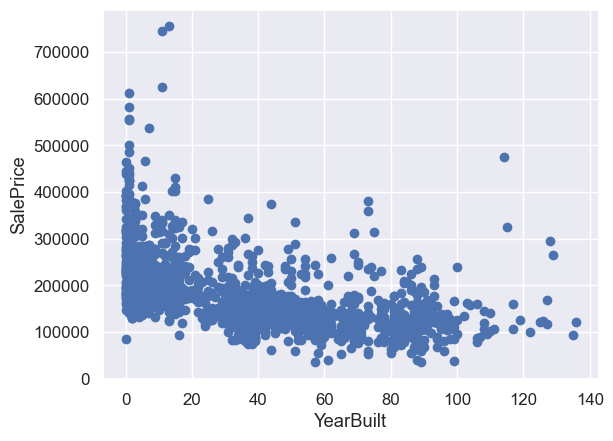

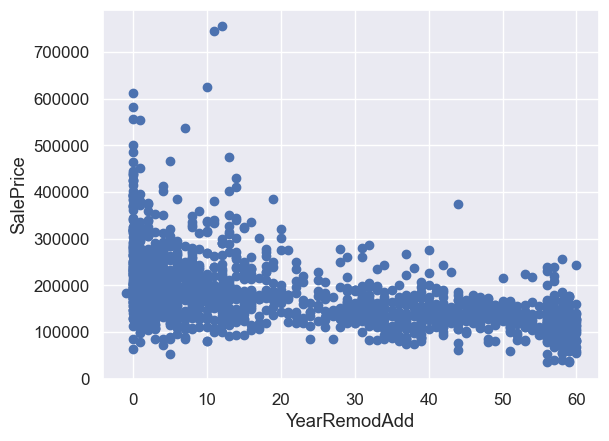

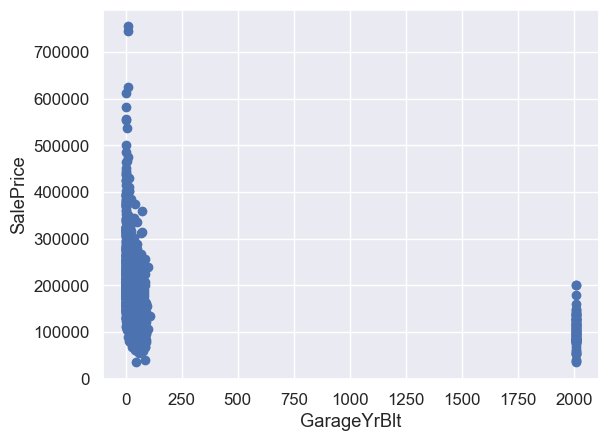

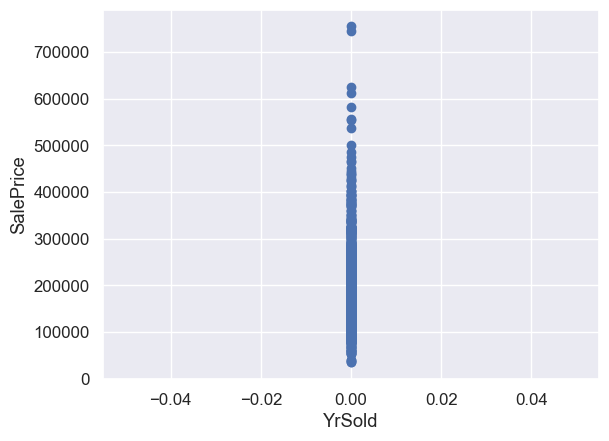

In [159]:
# will compare the differences between yr variable and house sold for:

for feature in year_features:
    if feature!='YrSold':
        data = df.copy()

    data[feature] = (data['YrSold']-data[feature])
    plt.scatter(data[feature] ,data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# **HeatMap**

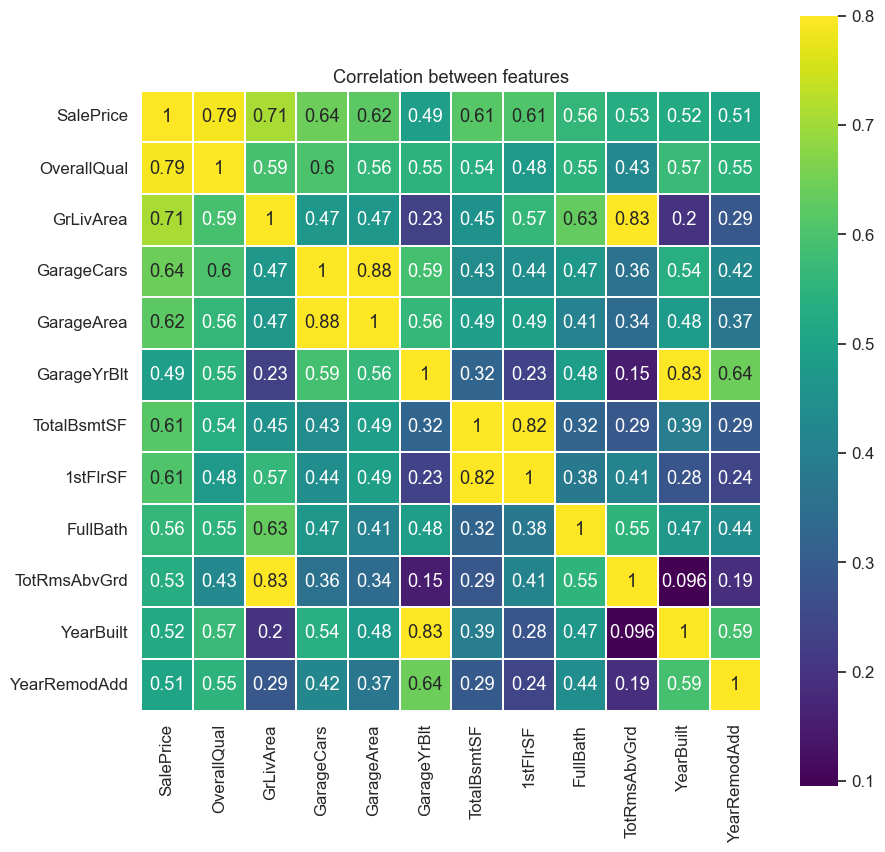

In [27]:
corrMatrix=df[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');


# **Pivotal Features**

In [28]:

df[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [29]:
df[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [30]:
df[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


# **Visualising Target variable**

C:\Users\HP\AppData\Local\Temp\ipykernel_29160\2225964371.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color="r", kde=False)


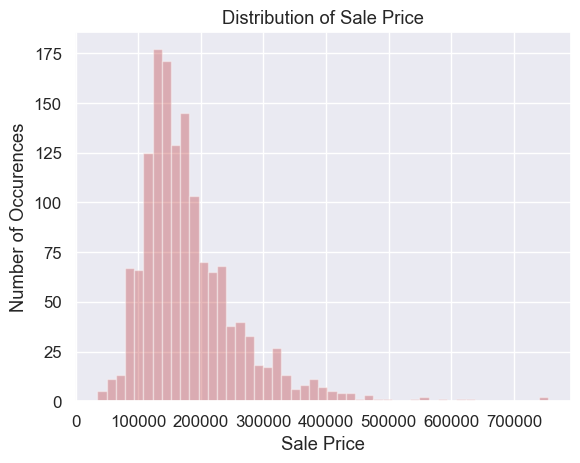

In [31]:

sns.distplot(df['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

Prices are right skewed and graph shows some peakedness.

In [33]:
#skewness  

df['SalePrice'].skew()

np.float64(1.8828757597682129)

In [34]:
#kurtosis

df['SalePrice'].kurt()

np.float64(6.536281860064529)

In [163]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                  ..
SaleCondition      0
SalePrice          0
SqrtLotArea        0
SalePriceSF        0
ConstructionAge    0
Length: 84, dtype: int64

In [165]:
df['LotFrontage'].isnull().sum()

np.int64(0)

# **MasVnrType and MasVnrArea**

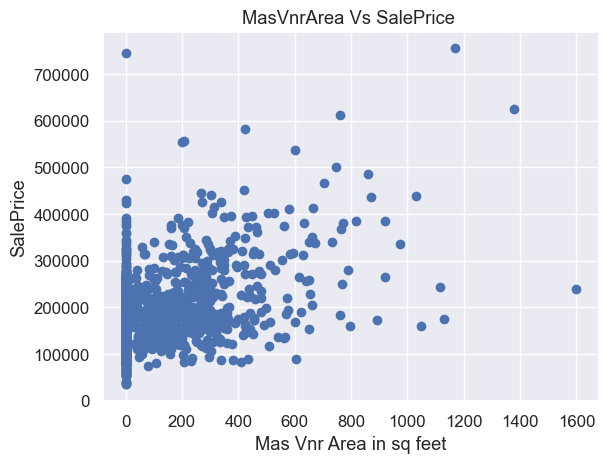

In [166]:
plt.scatter(df["MasVnrArea"],df["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

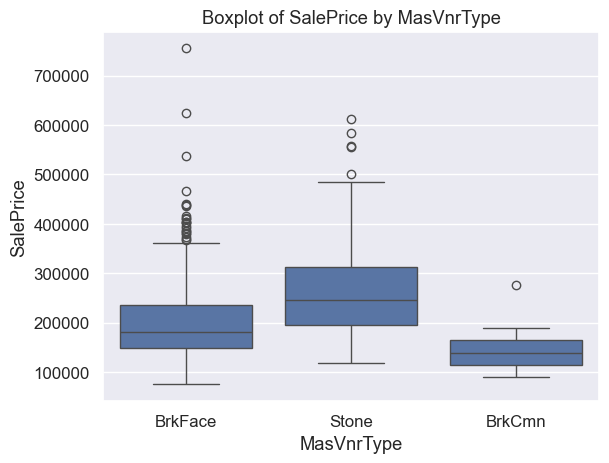

In [167]:
sns.boxplot(x="MasVnrType", y="SalePrice", data=df)
plt.title("Boxplot of SalePrice by MasVnrType")
plt.show()

# **ELECTRICAL**

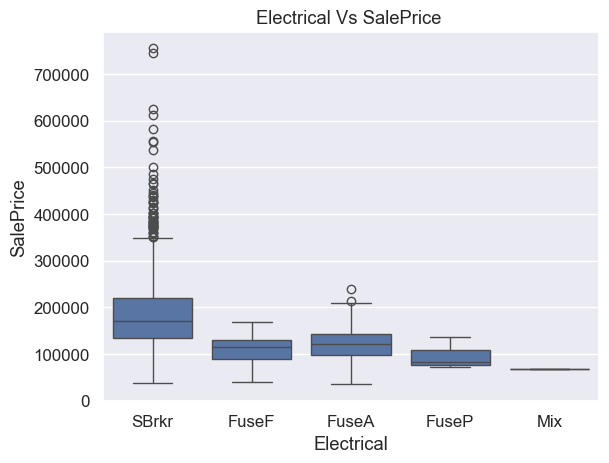

In [168]:
sns.boxplot(x = "Electrical",y = "SalePrice",data=df)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

In [169]:
df['Electrical'].isnull().sum()

np.int64(0)

In [170]:
#We can replace missing values with most frequent ones.
df["Electrical"] = df["Electrical"].fillna('SBrkr')

In [171]:
df['Electrical'].isnull().sum()

np.int64(0)

# **Alley**

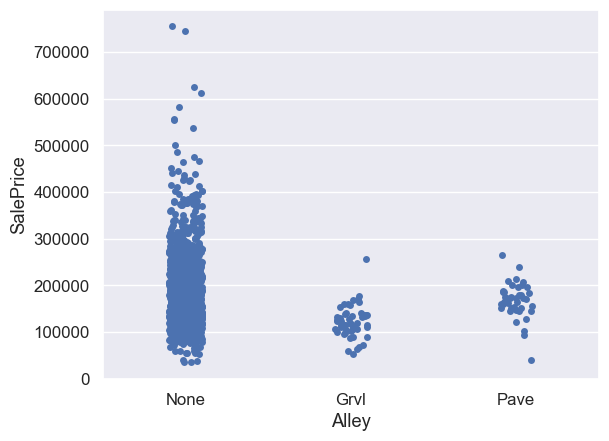

In [173]:
sns.stripplot(x=df["Alley"], y=df["SalePrice"],jitter=True);

In [54]:
df["Alley"] = df["Alley"].fillna('None')

In [175]:
df["Alley"].isnull().sum()

np.int64(0)

# **Basement Features**

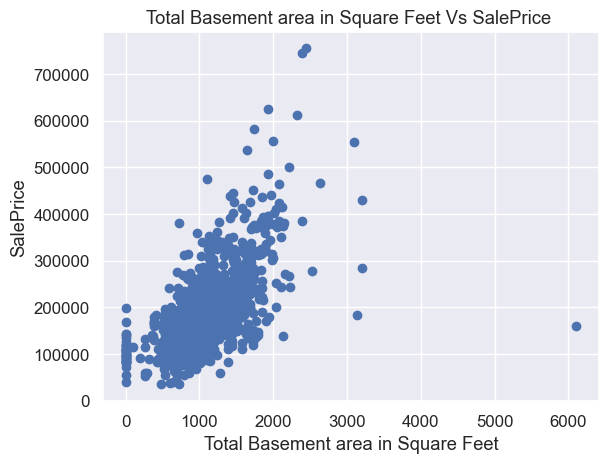

In [177]:
plt.scatter(df["TotalBsmtSF"],df["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

In [62]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
df[basement_cols][df['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [178]:
##All categorical variables contains NAN whereas continuous ones have 0.
##So that means there is no basement for those houses. we can replace it with 'None'.
for col in basement_cols:
    if 'FinSF'not in col:
        df[col] = df[col].fillna('None')

# **Fireplaces**

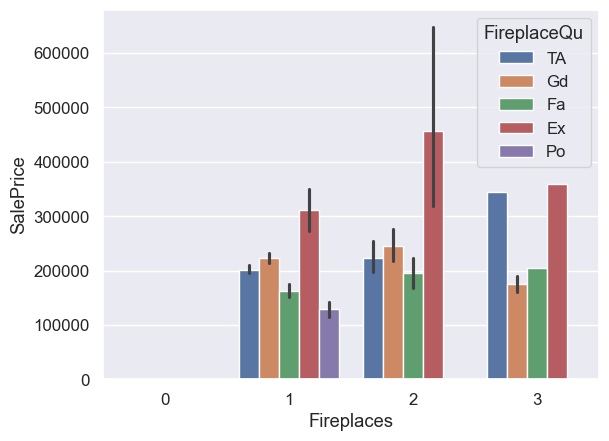

In [179]:
sns.barplot(x = "Fireplaces", y ="SalePrice",data=df,hue="FireplaceQu");

In [69]:
df["Fireplaces"].isnull().sum()

np.int64(0)

# **Garages**

C:\Users\HP\AppData\Local\Temp\ipykernel_29160\1350463898.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GarageArea"],color='r', kde=False);


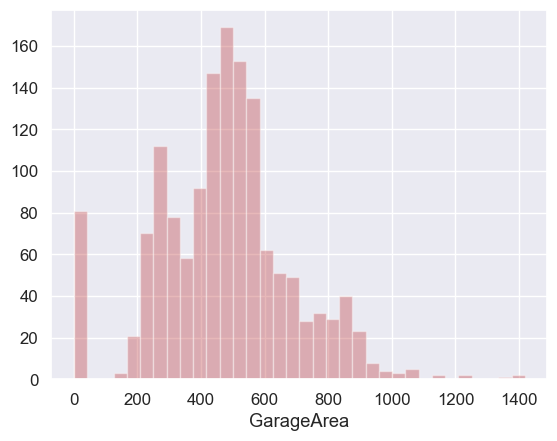

In [70]:
sns.distplot(df["GarageArea"],color='r', kde=False);

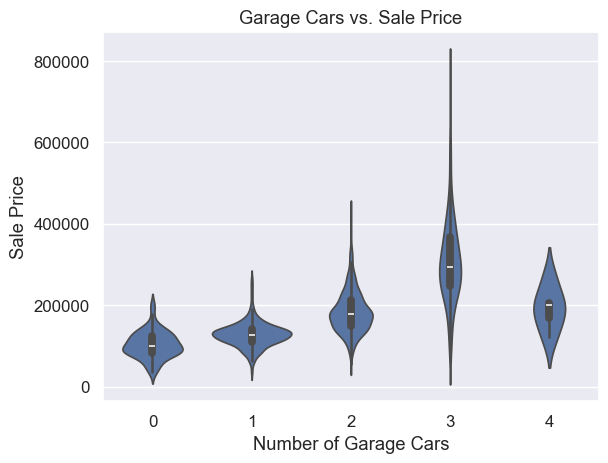

In [180]:
sns.violinplot(x="GarageCars", y="SalePrice", data=df)
plt.title("Garage Cars vs. Sale Price")
plt.ylabel("Sale Price")
plt.xlabel("Number of Garage Cars")
plt.show()


In [74]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
df[garage_cols][df['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [76]:
### All garage related features are missing values in same rows. that means we can replace categorical variables with None and continuous ones with 0.
for col in garage_cols:
    if df[col].dtype == object:  # Use the built-in 'object' instead of 'np.object'
        df[col] = df[col].fillna('None')
    else:
        df[col] = df[col].fillna(0)


# **Pool**

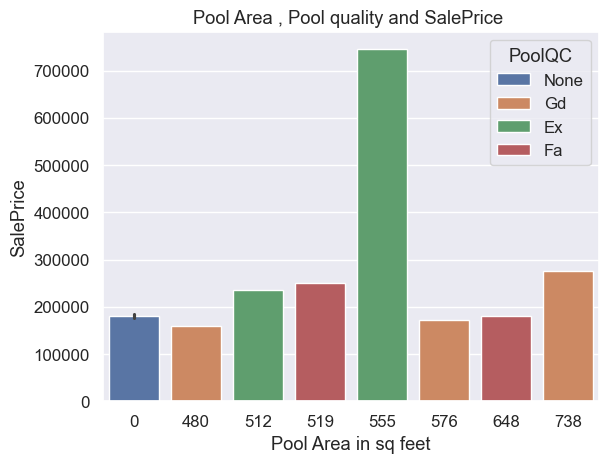

In [181]:
df["PoolQC"] = df["PoolQC"].fillna('None')
sns.barplot(x ="PoolArea",y="SalePrice",data=df,hue="PoolQC")
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

# **Fence**

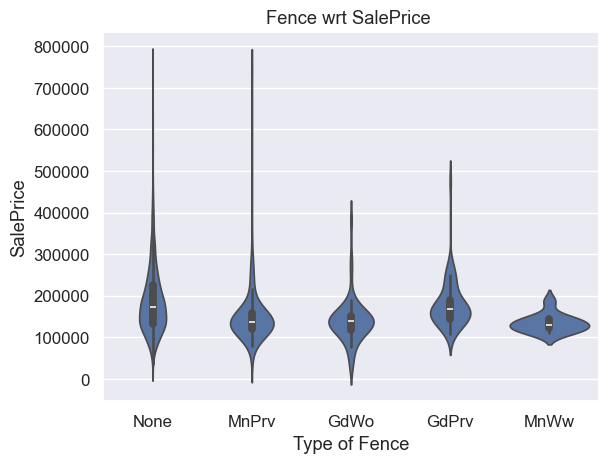

In [183]:
sns.violinplot(x = "Fence",y="SalePrice",data = df)
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");

In [188]:
##Fence has got 1179 null values. 
##We can safely assume that those houses doesn't have a Fence and replace those values with None.
df["Fence"] =df["Fence"].fillna('None')

In [190]:
df['Fence'].isnull().sum()

np.int64(0)

# **MiscFeature**

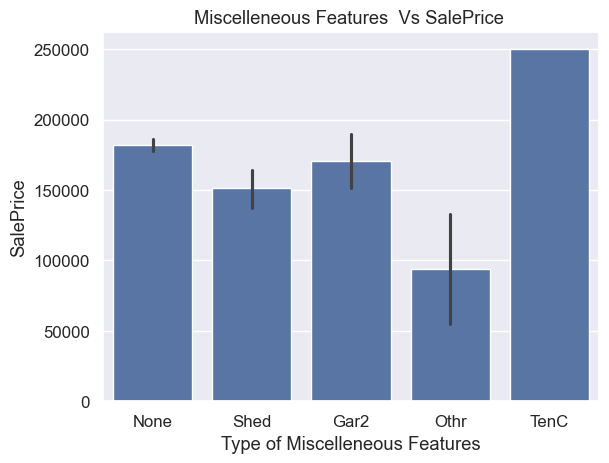

In [191]:
sns.barplot(x ="MiscFeature",y = "SalePrice",data = df)
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");

In [90]:
df['MiscFeature'].isnull().sum()

np.int64(1406)

In [91]:
#Some houses don't have miscellaneous features like shed, Tennis court etc..
df["MiscFeature"] = df["MiscFeature"].fillna('None')

In [192]:
#Let's confirm that we have removed all missing values
null_counts = df.isnull().sum()
print(null_counts)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                  ..
SaleCondition      0
SalePrice          0
SqrtLotArea        0
SalePriceSF        0
ConstructionAge    0
Length: 84, dtype: int64


# **MS ZONING**

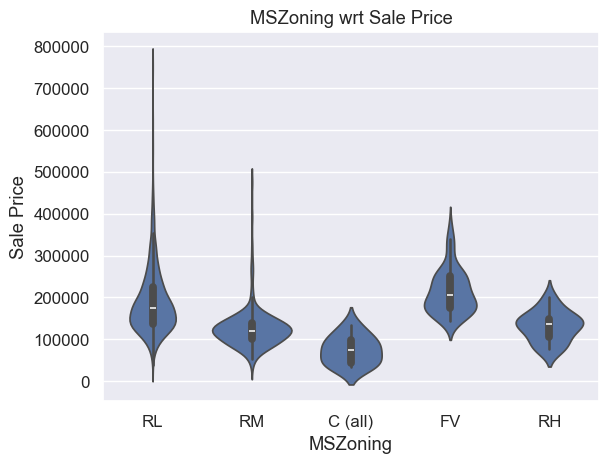

In [193]:
sns.violinplot(x ="MSZoning", y = "SalePrice",data = df)
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

# **1st Floor in square feet**

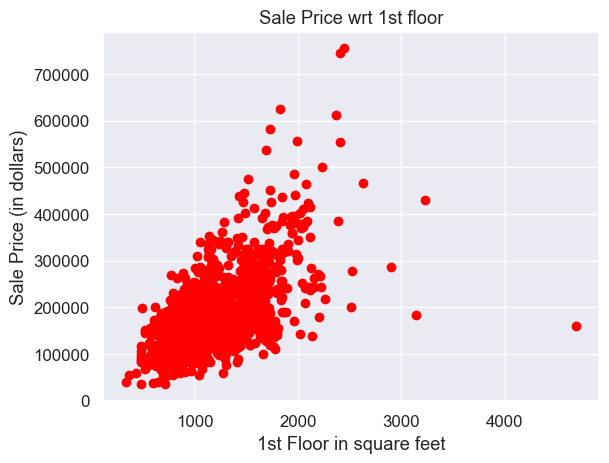

In [194]:
plt.scatter(df["1stFlrSF"],df.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

# **Ground Living Area w.r.t SalePrice**

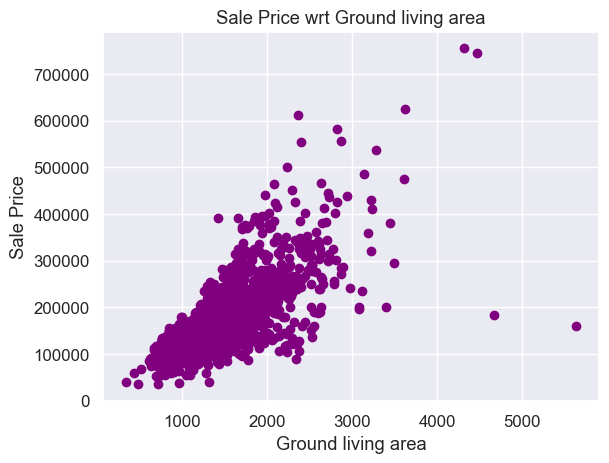

In [195]:
plt.scatter( df["GrLivArea"],df["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

# **SalePrice per square foot**

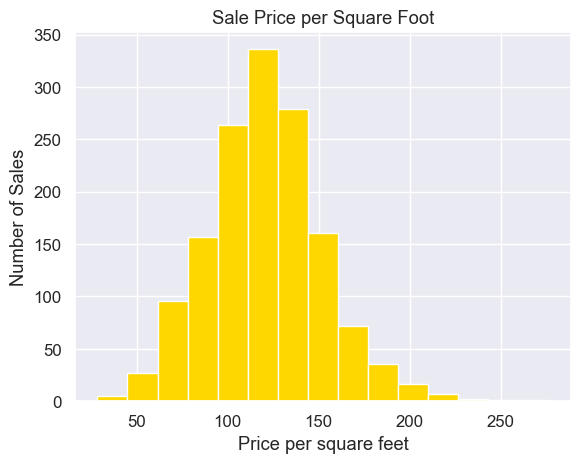

In [196]:
df['SalePriceSF'] =df['SalePrice']/df['GrLivArea']
plt.hist(df['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

In [125]:
#Average Sale Price per square feet 
print("$",df.SalePriceSF.mean())

$ 120.57287807326857


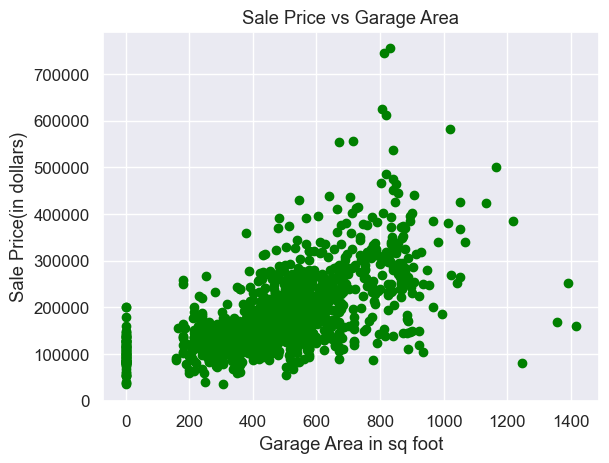

In [126]:
## Garage Area
plt.scatter(df["GarageArea"],df.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot");

C:\Users\HP\AppData\Local\Temp\ipykernel_29160\2015013089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearBuilt"],color='seagreen', kde=False);


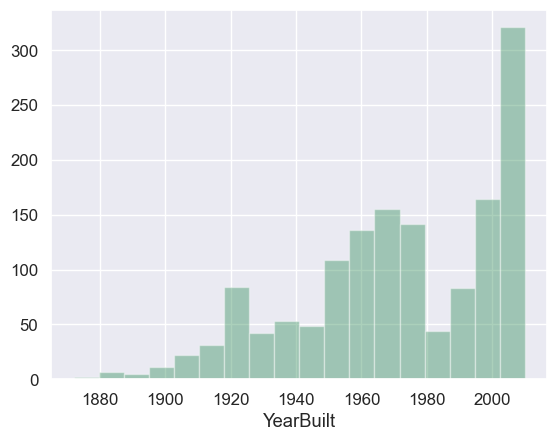

In [127]:
## Building , remodelling years and age of house¶
sns.distplot(df["YearBuilt"],color='seagreen', kde=False);

C:\Users\HP\AppData\Local\Temp\ipykernel_29160\2973644598.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearRemodAdd"].astype(int),color='r', kde=False);


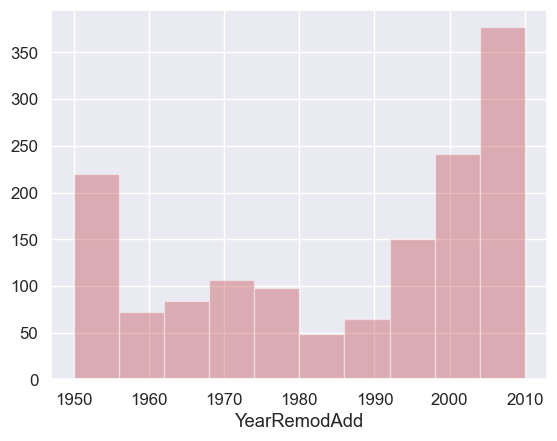

In [128]:
sns.distplot(df["YearRemodAdd"].astype(int),color='r', kde=False);

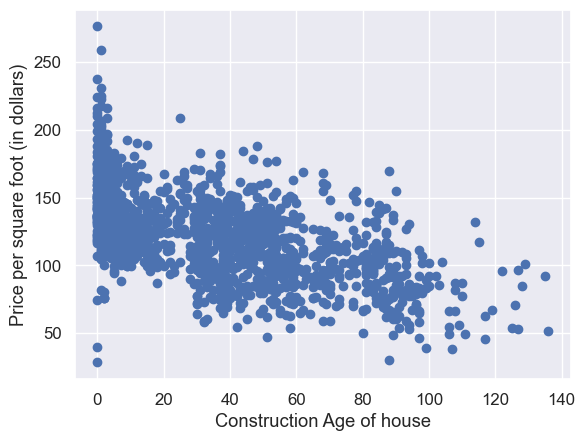

In [129]:
df['ConstructionAge'] = df['YrSold'] - df['YearBuilt']
plt.scatter(df['ConstructionAge'], df['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

# **Heating and AC arrangements**

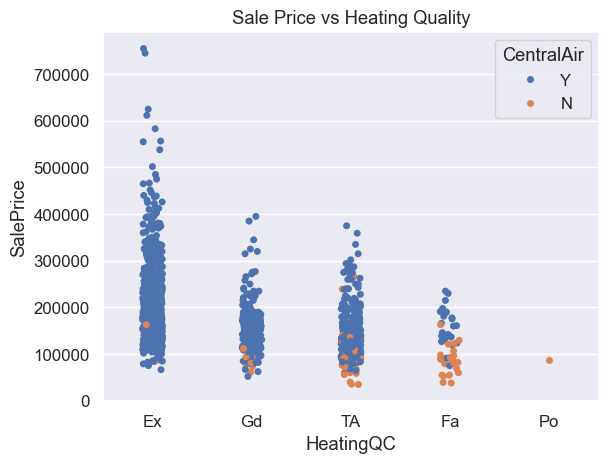

In [197]:

sns.stripplot(x="HeatingQC", y="SalePrice",data=df,hue='CentralAir',jitter=True)
plt.title("Sale Price vs Heating Quality");

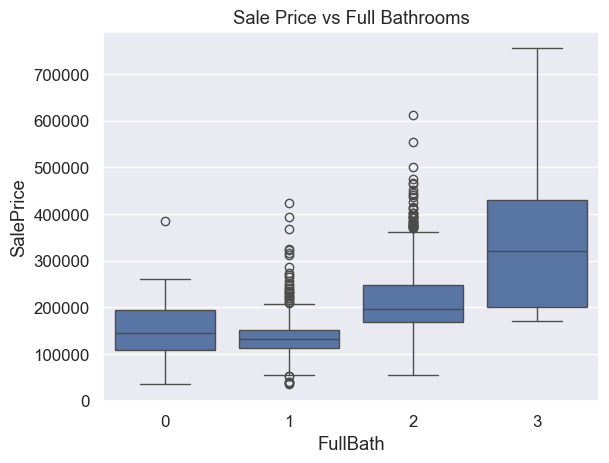

In [135]:
##Bathrooms in house

sns.boxplot(x = "FullBath",y= "SalePrice",data = df)
plt.title("Sale Price vs Full Bathrooms");

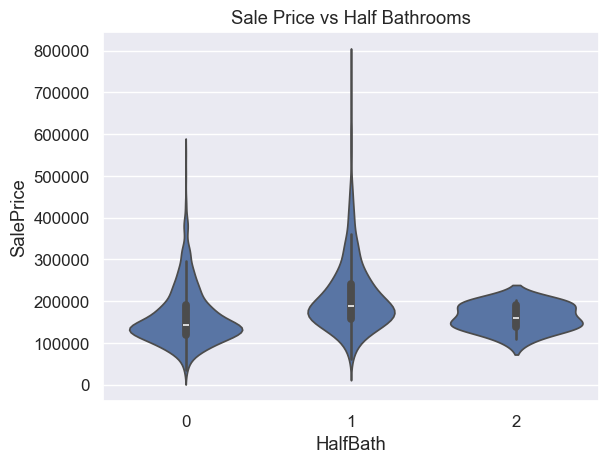

In [136]:
sns.violinplot( x = "HalfBath",y="SalePrice",data = df)
plt.title("Sale Price vs Half Bathrooms");

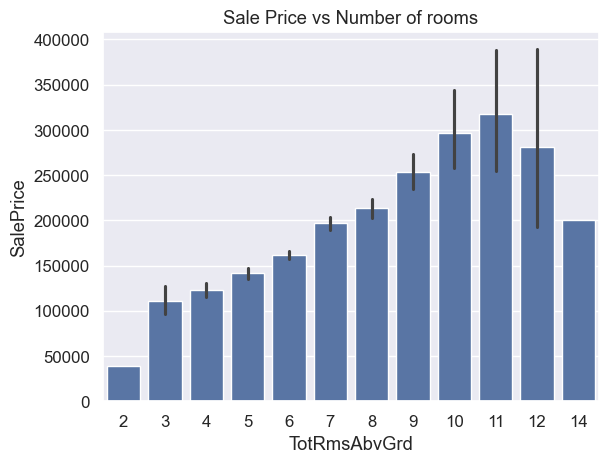

In [140]:
##Total rooms above grade
sns.barplot(x = "TotRmsAbvGrd",y="SalePrice",data = df)
plt.title("Sale Price vs Number of rooms");

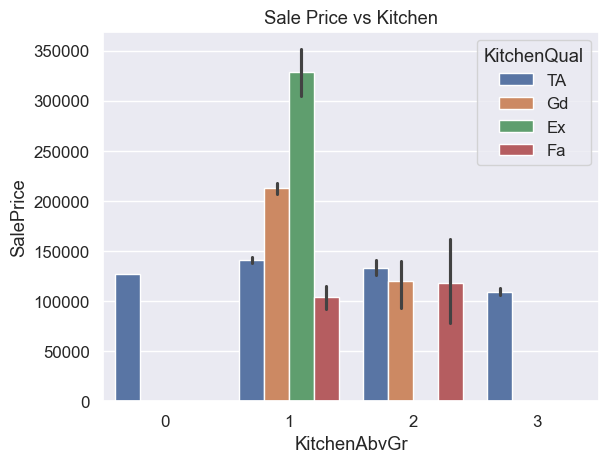

In [141]:
## Kitchen Quality
sns.barplot(x="KitchenAbvGr",y="SalePrice",data=df,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

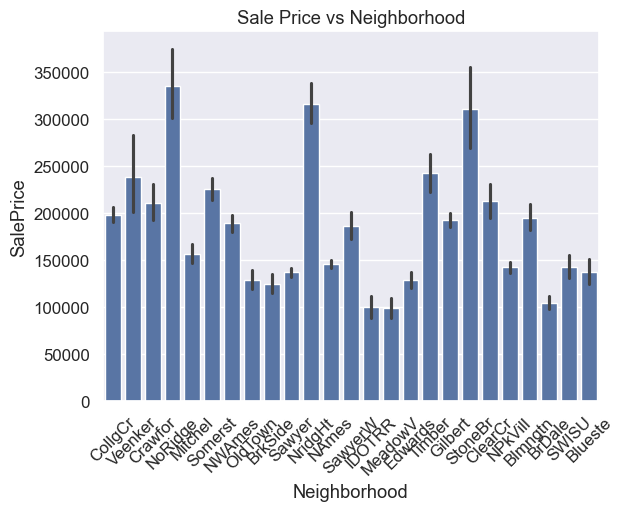

In [144]:
## Neighborhood
plt.xticks(rotation=45) 
sns.barplot(x="Neighborhood",y="SalePrice",data = df)
plt.title("Sale Price vs Neighborhood");

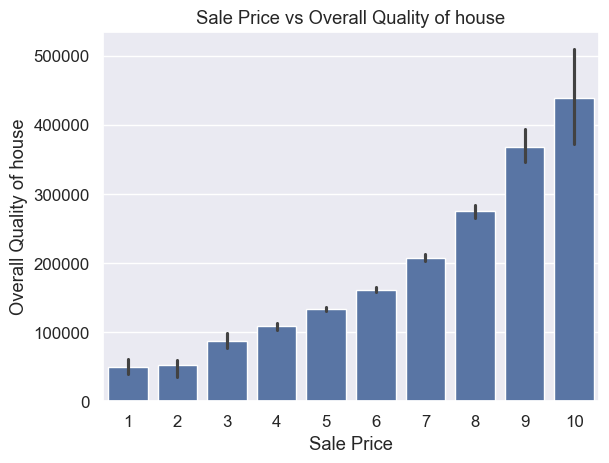

In [150]:
##Overall Quality 

sns.barplot(x="OverallQual",y="SalePrice",data = df)
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

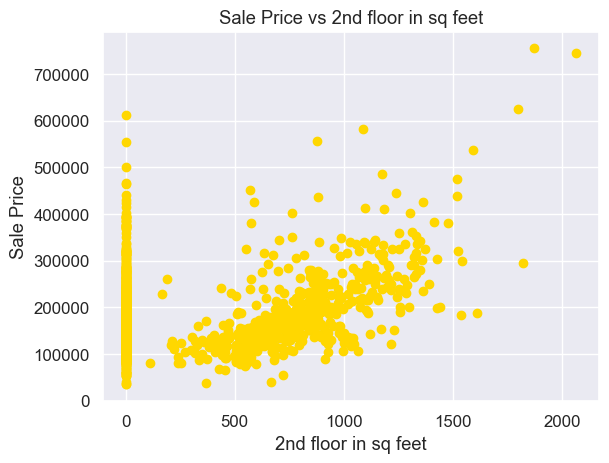

In [151]:
##2nd Floor with SalePrice
plt.scatter(df["2ndFlrSF"],df["SalePrice"],color="gold")
plt.title("Sale Price vs 2nd floor in sq feet");
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price");

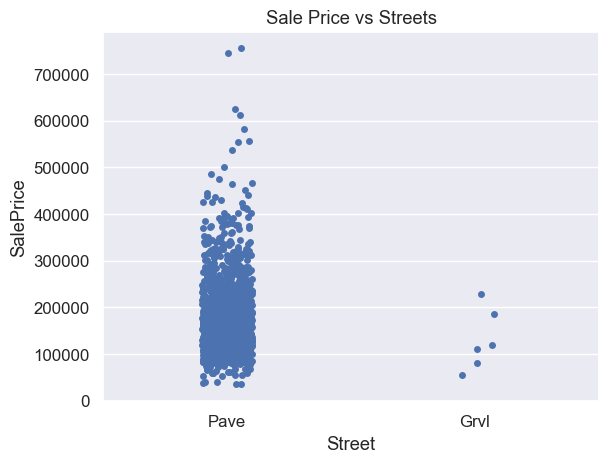

In [152]:
#most streets are paved lets visulalize it
sns.stripplot(x=df["Street"], y=df["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

# **Outliers**

C:\Users\HP\AppData\Local\Temp\ipykernel_29160\3598601229.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '527331.9149999974' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SalePrice'] > upperlimit, 'SalePrice'] = upperlimit


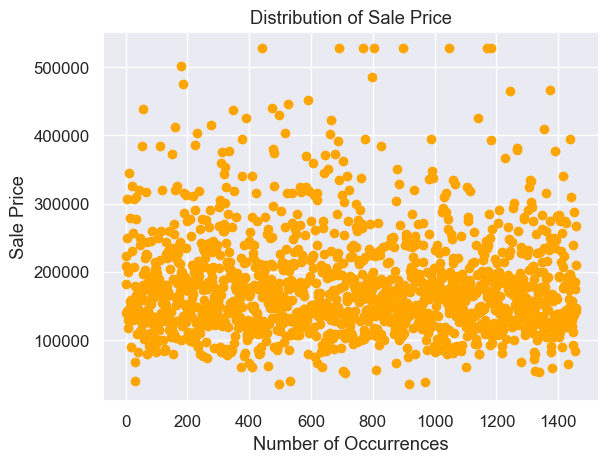

In [198]:


# Calculate the upper limit for SalePrice using the 99.5th percentile
upperlimit = np.percentile(df.SalePrice.values, 99.5)

# Cap the SalePrice values at the upper limit using .loc
df.loc[df['SalePrice'] > upperlimit, 'SalePrice'] = upperlimit

# Create a scatter plot to visualize the distribution of Sale Price
plt.scatter(range(df.shape[0]), df["SalePrice"].values, color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurrences")
plt.ylabel("Sale Price")
plt.show()


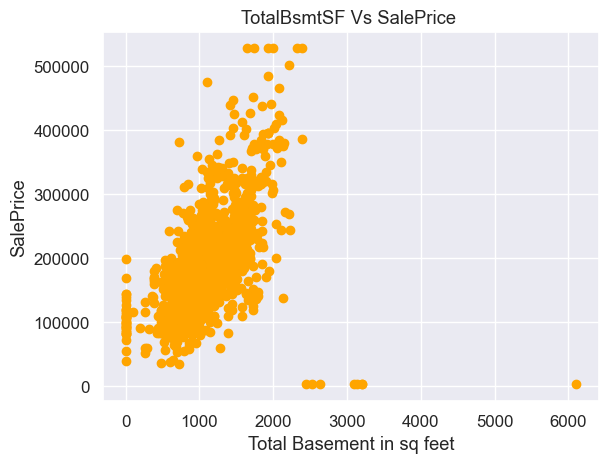

In [200]:

upperlimit = np.percentile(df.TotalBsmtSF.values, 99.5)
df.loc[df['TotalBsmtSF'] >upperlimit,'SalePrice'] = upperlimit

plt.scatter(df.TotalBsmtSF, df["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");